<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/03-Agrupamiento-Jerarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Agrupamiento Jerarquico
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de agrupamiento jerárquico a un conjunto de datos.

Los paquetes necesarios son:

In [98]:
# Paquetes necesarios
import pandas as pd
from google.colab import files
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

---
## <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [2]:
uploaded = files.upload()

Saving movies.csv to movies.csv


In [7]:
# Cargar el archivo
df = pd.read_csv("movies.csv")

# Mostrar algunos datos
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [9]:
# Información general
df.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [24]:
# Separar las variables
numericas = df[['budget', 'popularity', 'runtime', 'revenue', 'vote_average', 'vote_count']].dropna()

# Escalado de datos
scaler = StandardScaler()
variables_escaladas = scaler.fit_transform(numericas)

---
## <font color='264CC7'> Dendograma </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Genera el dendograma de los datos.
<ul>
  <li>Usa diferentes métricas y funciones de enlace.</li>
  <li>Toma una distancia de corte.</li>
  <li>De manera intutiva, ¿por qué tomaste la métrica y la distancia de corte?</li>
</ul>
</div>

El Dendrograma 2 presenta una separación más clara y equilibrada entre los grupos, se utilizó la distancia euclidiana debido a que las variables numéricas fueron previamente escaladas.
La distancia de corte fue establecida aproximadamente en 6.5, valor que se eligió al observar el dendrograma para obtener clusters bien definidos y coherentes con la estructura de los datos.

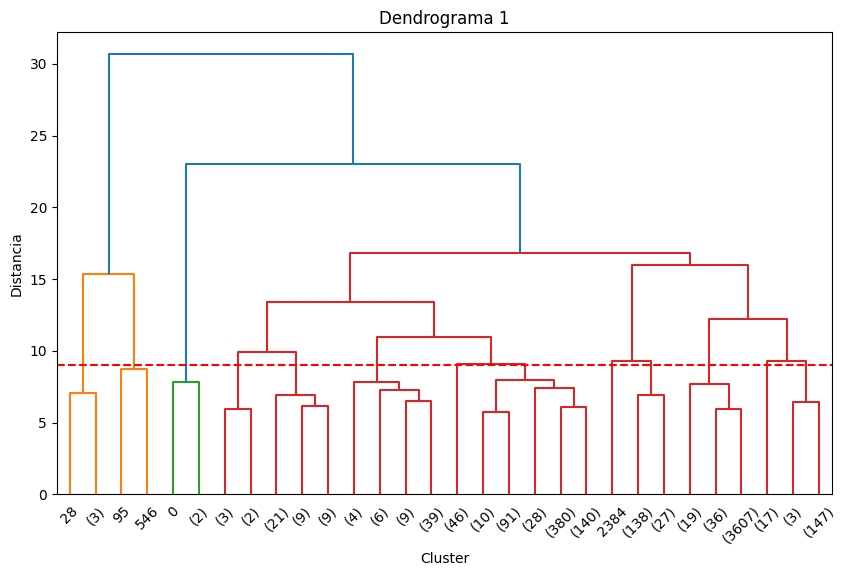

In [42]:
# Dendograma 1
d1 = linkage(variables_escaladas, method='complete', metric='euclidean')
distancia_corte = 9

plt.figure(figsize=(10, 6))
dendrogram(d1, truncate_mode='lastp', p=30)
plt.axhline(y=distancia_corte, color='r', linestyle='--')
plt.title("Dendrograma 1")
plt.xlabel("Cluster")
plt.ylabel("Distancia")
plt.show()

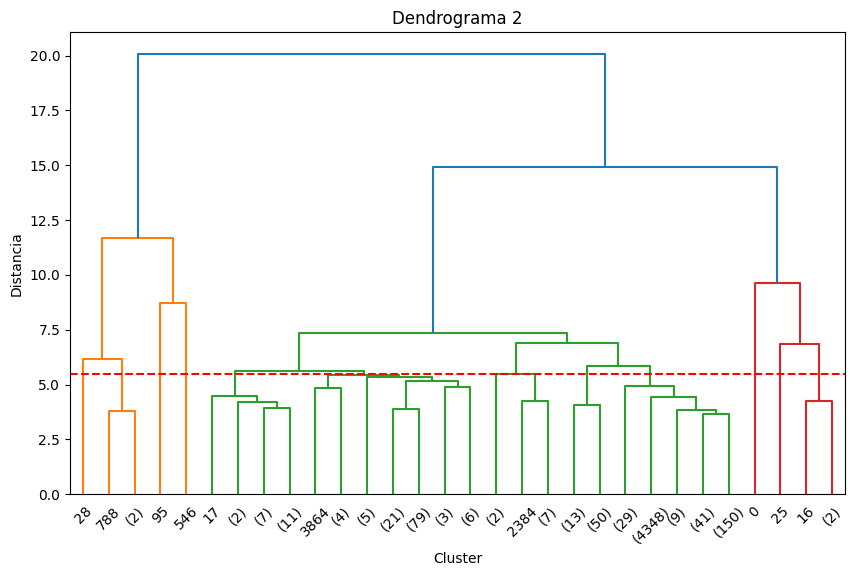

In [57]:
# Dendograma 2
d2 = linkage(variables_escaladas, method='average', metric='euclidean')
distancia_corte_seleccionada = 5.5

plt.figure(figsize=(10, 6))
dendrogram(d2, truncate_mode='lastp', p=30)
plt.axhline(y=distancia_corte_seleccionada, color='r', linestyle='--')
plt.title("Dendrograma 2")
plt.xlabel("Cluster")
plt.ylabel("Distancia")
plt.show()

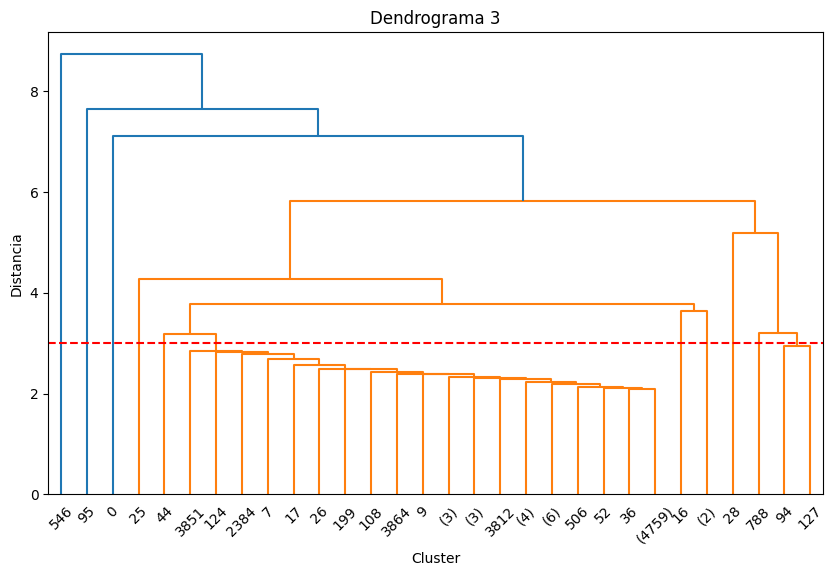

In [48]:
# Dendograma 3
d3 = linkage(variables_escaladas, method='single', metric='euclidean')
distancia_corte = 3

plt.figure(figsize=(10, 6))
dendrogram(d3, truncate_mode='lastp', p=30)
plt.axhline(y=distancia_corte, color='r', linestyle='--')
plt.title("Dendrograma 3")
plt.xlabel("Cluster")
plt.ylabel("Distancia")
plt.show()

---
## <font color='264CC7'> Asignación de grupos y análisis </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza un análisis de los grupos obtenidos.
<ul>
  <li>Asigna los grupos.</li>
  <li>Revisa la media de cada grupo.</li>
  <li>Revisa el mínimo y máximo de cada grupo.</li>
  <li>Muestra algunos integrantes de cada grupo.</li>
</ul>
</div>

In [119]:
# Asignar clusters
clusters = fcluster(d2, t=5, criterion='distance')

# Agregar los clusters
clusterizado = numericas.copy()
clusterizado['Cluster'] = clusters

clusterizado.head()

,budget,popularity,runtime,revenue,vote_average,vote_count,Cluster
0,237000000,150.437577,162.0,2787965087,7.2,11800,16
1,300000000,139.082615,169.0,961000000,6.9,4500,5
2,245000000,107.376788,148.0,880674609,6.3,4466,5
3,250000000,112.312950,165.0,1084939099,7.6,9106,5
4,260000000,43.926995,132.0,284139100,6.1,2124,13


In [120]:
clusterizado['Cluster'].value_counts().sort_index()

,count
Cluster,
1,3
2,1
3,1
4,1
5,21
6,5
7,5
8,100
9,9


In [74]:
for cluster in clusterizado['Cluster'].unique():
    print(f"\nCluster {cluster}")
    display(clusterizado[clusterizado['Cluster'] == cluster].head(3))


Cluster 16


,budget,popularity,runtime,revenue,vote_average,vote_count,Cluster
0,237000000,150.437577,162.0,2787965087,7.2,11800,16



Cluster 5


,budget,popularity,runtime,revenue,vote_average,vote_count,Cluster
1,300000000,139.082615,169.0,961000000,6.9,4500,5
2,245000000,107.376788,148.0,880674609,6.3,4466,5
3,250000000,112.312950,165.0,1084939099,7.6,9106,5



Cluster 13


,budget,popularity,runtime,revenue,vote_average,vote_count,Cluster
4,260000000,43.926995,132.0,284139100,6.1,2124,13
6,260000000,48.681969,100.0,591794936,7.4,3330,13
10,270000000,57.925623,154.0,391081192,5.4,1400,13



Cluster 8


,budget,popularity,runtime,revenue,vote_average,vote_count,Cluster
11,200000000,107.928811,106.0,586090727,6.1,2965,8
14,225000000,99.398009,143.0,662845518,6.5,6359,8
20,215000000,89.866276,136.0,752215857,6.5,6586,8



Cluster 14


,budget,popularity,runtime,revenue,vote_average,vote_count,Cluster
16,220000000,144.448633,143.0,1519557910,7.4,11776,14
65,185000000,187.322927,152.0,1004558444,8.2,12002,14
96,160000000,167.583710,148.0,825532764,8.1,13752,14



Cluster 15


,budget,popularity,runtime,revenue,vote_average,vote_count,Cluster
25,200000000,100.025899,194.0,1845034188,7.5,7562,15



Cluster 2


,budget,popularity,runtime,revenue,vote_average,vote_count,Cluster
28,150000000,418.708552,124.0,1513528810,6.5,8662,2



Cluster 7


,budget,popularity,runtime,revenue,vote_average,vote_count,Cluster
82,170000000,243.791743,130.0,710644566,7.3,4410,7
88,165000000,203.734590,102.0,652105443,7.8,6135,7
108,155000000,202.042635,126.0,440603537,5.8,3631,7



Cluster 1


,budget,popularity,runtime,revenue,vote_average,vote_count,Cluster
94,170000000,481.098624,121.0,773328629,7.9,9742,1
127,150000000,434.278564,120.0,378858340,7.2,9427,1
788,58000000,514.569956,108.0,783112979,7.4,10995,1



Cluster 3


,budget,popularity,runtime,revenue,vote_average,vote_count,Cluster
95,165000000,724.247784,169.0,675120017,8.1,10867,3



Cluster 9


,budget,popularity,runtime,revenue,vote_average,vote_count,Cluster
262,93000000,138.049577,178.0,871368364,8.0,8705,9
287,100000000,82.121691,165.0,425368238,7.8,10099,9
329,94000000,123.630332,201.0,1118888979,8.1,8064,9



Cluster 4


,budget,popularity,runtime,revenue,vote_average,vote_count,Cluster
546,74000000,875.581305,91.0,1156730962,6.4,4571,4



Cluster 6


,budget,popularity,runtime,revenue,vote_average,vote_count,Cluster
690,60000000,103.698022,189.0,284600000,8.2,4048,6
1818,22000000,104.469351,195.0,321365567,8.3,4329,6
2731,13000000,105.792936,200.0,47542841,8.3,3338,6



Cluster 11


,budget,popularity,runtime,revenue,vote_average,vote_count,Cluster
1125,31115000,13.244365,248.0,71000000,6.7,146,11
1922,0,5.529035,254.0,25000000,6.6,90,11
2373,0,9.814785,242.0,0,7.3,117,11



Cluster 12


,budget,popularity,runtime,revenue,vote_average,vote_count,Cluster
1464,0,0.126738,100.0,0,0.0,0,12
2272,0,0.485405,98.0,0,0.5,1,12
3669,0,0.407030,0.0,0,0.0,0,12



Cluster 10


,budget,popularity,runtime,revenue,vote_average,vote_count,Cluster
3852,0,0.042346,200.0,0,0.0,0,10
4389,0,0.887821,200.0,0,3.4,6,10


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Da una descripción de los grupos obtenidos. Asigna un nombre a cada grupo.
</div>

Cluster 1 – Películas populares:
Agrupa películas con niveles altos de popularidad y buena visibilidad entre el público, aunque sin comportamientos extremos en ingresos o valoración.

Cluster 2 – Película con popularidad excepcional:
Corresponde a un caso aislado que presenta un nivel de popularidad muy superior al resto de las películas del conjunto de datos.

Cluster 3 – Outliers:
Incluye películas con características muy diferentes al promedio, que no encajan claramente en los demás grupos debido a valores atípicos en una o varias variables.

Cluster 4 – Película con popularidad inusualmente alta:
Representa una película cuya popularidad es considerablemente mayor a la esperada en relación con otras características como presupuesto o recaudación.

Cluster 5 – Películas de alto presupuesto:
Contiene producciones con presupuestos elevados, generalmente asociadas a grandes estudios y orientadas a un público amplio.

Cluster 6 – Películas bien valoradas pero no populares:
Agrupa películas con buenas calificaciones promedio, pero con baja popularidad o menor alcance comercial.

Cluster 7 – Películas populares con resultados promedio:
Incluye películas con buena popularidad, pero cuyos ingresos y valoraciones se mantienen en niveles medios.

Cluster 8 – Películas comerciales estables:
Corresponde a producciones con comportamiento equilibrado, ingresos consistentes y popularidad moderada sin grandes variaciones.

Cluster 9 – Películas bien valoradas y exitosas:
Agrupa películas que combinan buenas calificaciones con un desempeño económico favorable.

Cluster 10 – Películas sin impacto comercial:
Incluye películas con muy baja recaudación y escasa presencia en términos de popularidad y número de votos.

Cluster 11 – Películas de bajo presupuesto:
Corresponde a producciones realizadas con recursos limitados, generalmente con menor alcance comercial.

Cluster 12 – Películas sin información relevante:
Agrupa registros con datos incompletos o nulos en variables clave como ingresos, popularidad o votos.

Cluster 13 – Películas costosas con resultados variables:
Incluye películas de alto costo cuya recaudación y aceptación del público presentan resultados irregulares.

Cluster 14 – Películas grandes y bien valoradas:
Agrupa producciones de gran presupuesto que además cuentan con buenas valoraciones por parte del público.

Cluster 15 – Películas largas con buen desempeño:
Corresponde a películas con mayor duración que logran buenos resultados en términos de ingresos y aceptación.

Cluster 16 – Película con éxito comercial excepcional:
Representa una producción con ingresos y alcance comercial muy superiores al resto del conjunto de datos.

---
## <font color='264CC7'> Visualizaciones  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
  <li>Indica el porcentaje de la variaza explicada en el gráfico, ¿afecta esto a tu visualización?</li>
</ul>
</div>

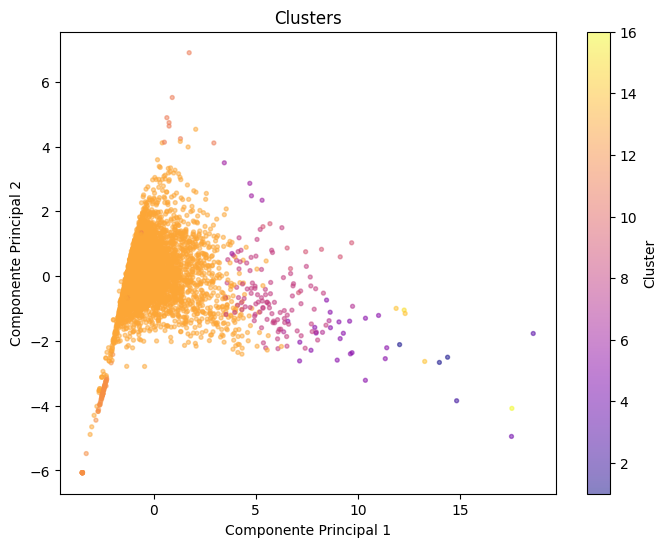

In [96]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Aplicar PCA a los datos escalados
pca = PCA(n_components=2)
X_pca = pca.fit_transform(variables_escaladas)

# Gráfico
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=clusters,
    cmap='plasma',
    s=8,
    alpha=0.5
)
plt.title("Clusters")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(scatter, label="Cluster")
plt.show()

In [84]:
# Varianza explicada
var_exp = pca.explained_variance_ratio_ * 100
print(f"Varianza explicada por PC1 y PC2: {var_exp.sum():.2f}%")

Varianza explicada por PC1 y PC2: 73.57%


Los grupos obtenidos parecen adecuados, ya que se identifica un grupo principal que concentra la mayoría de las observaciones y varios grupos más pequeños que representan casos particulares o atípicos, lo cual es coherente con la naturaleza de los datos analizados. En la visualización en dos dimensiones mediante PCA, las dos primeras componentes principales explican aproximadamente el porcentaje de varianza indicado en el gráfico, lo que significa que no toda la información original está siendo representada. Esto afecta la visualización en el sentido de que algunos grupos se superponen, aunque dicha superposición no implica un mal agrupamiento, sino que es consecuencia de la reducción de dimensionalidad.

---
## <font color='264CC7'> Métricas  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula la métrica de la silueta para los grupos obtenidos. ¿Qué tan buenos te parecen los grupos?
</div>

In [97]:
from sklearn.metrics import silhouette_score

# Calcular el coeficiente de silueta
silhouette_avg = silhouette_score(variables_escaladas, clusters)

print(f"Coeficiente de silueta promedio: {silhouette_avg:.3f}")

Coeficiente de silueta promedio: 0.539


El coeficiente de silueta promedio obtenido es 0.539, lo cual indica que los grupos formados presentan una buena separación y coherencia interna. Este valor sugiere que las observaciones están más cerca de los elementos de su propio cluster que de los de otros grupos, lo que refleja un agrupamiento de buena calidad. El valor confirma que los clusters obtenidos son adecuados y representan de manera razonable la estructura del conjunto de datos.

---
## <font color='264CC7'> Iteraciones </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza el proceso de agrupamiento jerárquico con diferentes parámetros, analiza la métrica de la silueta de cada uno e indica cuál es el mejor.
</div>

In [129]:
# Método single
Z_single = linkage(variables_escaladas, method='single', metric='euclidean')
clusters_single = fcluster(Z_single, t=2.5, criterion='distance')

sil_single = silhouette_score(variables_escaladas, clusters_single)
print("Métrica Silueta (single):", round(sil_single, 3))

Métrica Silueta (single): 0.603


In [130]:
# Método complete
Z_complete = linkage(variables_escaladas, method='complete', metric='euclidean')
clusters_complete = fcluster(Z_complete, t=9, criterion='distance')

sil_complete = silhouette_score(variables_escaladas, clusters_complete)
print("Métrica Silueta (complete):", round(sil_complete, 3))

Métrica Silueta (complete): 0.36


In [116]:
# Método average
Z_average = linkage(variables_escaladas, method='average', metric='euclidean')
clusters_average = fcluster(Z_average, t=5, criterion='distance')

sil_average = silhouette_score(variables_escaladas, clusters_average)
print("Silueta (average):", round(sil_average, 3))

Silueta (average): 0.539


In [131]:
# Método ward
Z_ward = linkage(variables_escaladas, method='ward')
clusters_ward = fcluster(Z_ward, t=3, criterion='distance')

sil_ward = silhouette_score(variables_escaladas, clusters_ward)
print("Silueta (ward):", round(sil_ward, 3))

Silueta (ward): 0.15


Se observa que el método single presenta el valor más alto. Sin embargo, este resultado se debe al efecto cadena característico de dicho método, el cual tiende a generar clusters poco compactos y difíciles de interpretar. El método average obtiene un coeficiente de silueta alto de 0.539 y produce grupos más coherentes y estables. Los métodos complete y ward muestran valores de silueta considerablemente menores. Por esta razón, se considera que el método de enlace promedio con distancia euclidiana ofrece el mejor compromiso entre calidad del agrupamiento e interpretabilidad de los grupos.